In [1]:

from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from matplotlib import pyplot as plt
import sys, os
from tensorboard.backend.event_processing import event_accumulator
import numpy as np
from matplotlib.ticker import FormatStrFormatter
sys.path.append("../src/")
from pathlib import Path
from PlottingUtil import Plot_logs_nscale, Plot_logs_Mean


Text(0.5, 0, 'Epoch')

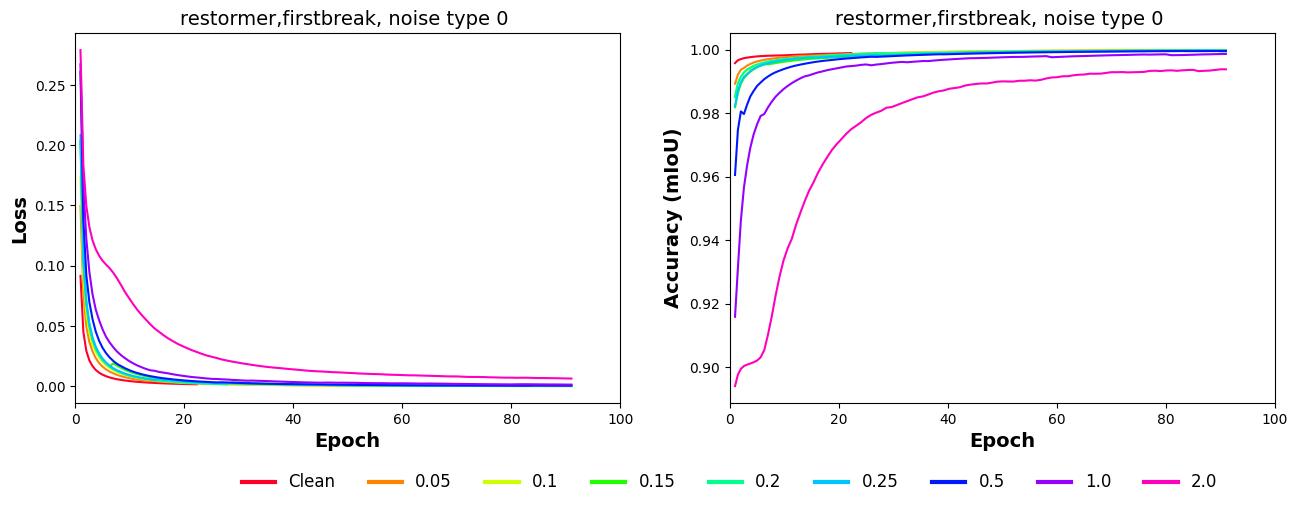

In [2]:
savefigure=False #save image?
save_path= None # saved in '../L=logs/' otherwise specify the path you want to save images 

model_type = 'restormer'
problem='firstbreak'
attack='none'
pretrained=False
c='gist_rainbow'
folder =None 
noise_type=0

Plot_logs_nscale(problem,model_type,noise_type,attack='none',ax=None,c=c,ts_factor=0.9, a=0.4,pretrained=pretrained,folder=folder,L='-')
if problem =='firstbreak':
    plt.ylabel('Accuracy (mIoU)',fontsize=14,fontweight='bold')
else:

    plt.ylabel('Accuracy (RMSE)',fontsize=14,fontweight='bold')

plt.xlabel('Epoch',fontsize=14,fontweight='bold')

if savefigure==True:
    if save_path is None:
        save_path = Path(f"../images/Logs/")
        save_path.mkdir(parents=True, exist_ok=True)
            
    plt.savefig(f'{save_path}/Logs_{problem}_{model_type}_attack_{attack}_noisetype{noise_type}_noisscales_pt_{pretrained}.jpg',dpi=1000, bbox_inches='tight',transparent=True)


Text(0.5, 1.0, '(b) Compound Noise')

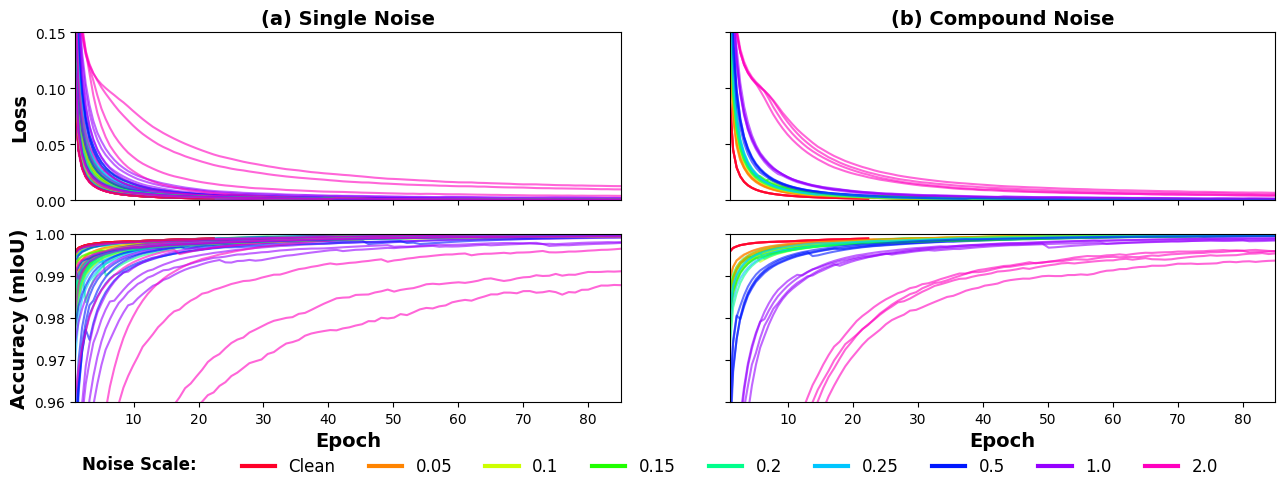

In [3]:

savefigure=False #save image?
save_path= None # saved in '../L=logs/' otherwise specify the path you want to save images 

noise_type=0
noise_scale=0.25
model_type = 'restormer'
problem='firstbreak'
attack='none'

pretrained=False
c='gist_rainbow'
f =[None] 


l={'50E':'--',None:'-'}

fig, axes= plt.subplots(nrows=2, ncols=2, sharex= True, sharey= False)
ax=axes.flatten()

a1=[ax[1],ax[3]]
for folder in f:
    for noise_type in [0,1,2,3]:
        Plot_logs_nscale(problem,model_type,noise_type,attack='none',ax=a1,
                          c=c,ts_factor=0.9, a=0.6,pretrained=pretrained,folder=folder,L='-')
        
        if problem =='firstbreak':
            if model_type!='unet':
                a1[0].set_ylim([0,0.15])
            a1[1].set_ylim([0.88,1])
            pass
        else:
            if model_type!='unet':
                    a1[0].set_ylim([0,0.03])
                    a1[1].set_ylim([0.18,0])
            else:

                    pass

        for i in range (0,len(a1),1):
            a1[i].set_xlim([1,85])
            a1[i].set_title('')
            
            a1[i].locator_params(axis ='y',nbins=5)
            a1[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
a1[1].set_xlabel('Epoch',fontsize=14,fontweight='bold')
           
plt.legend('off')

a2=[ax[0],ax[2]]



a2=[ax[0],ax[2]]

for folder in f:
    for noise_type in [7,8,10,9,11,12,13,14]:
        Plot_logs_nscale(problem,model_type,noise_type,attack='none',ax=a2,c=c,ts_factor=0.9, a=0.6,pretrained=pretrained,folder=folder,L='-')

    
    if problem =='firstbreak':
            if model_type!='unet':
                a2[0].set_ylim([0,0.15])
            a2[1].set_ylim([0.88,1])
            a2[1].set_ylabel('Accuracy (mIoU)',fontsize=14,fontweight='bold')
            pass
    else:
            if model_type!='unet':
                    a2[0].set_ylim([0,0.03])
                    a2[1].set_ylim([0.18,0])
                
            else:

                    pass

            a2[1].set_ylabel('Accuracy (RMSE)',fontsize=14,fontweight='bold')


if noise_type>11:
    TT='structured'
else:
    TT='Random'

for i in range (0,len(a2),1):
    a2[i].set_xlim([1,85])
    a2[i].set_title('')

    a2[i].locator_params(axis ='y',nbins=5)

a1[0].set_ylabel('')
a2[1].set_xlabel('Epoch',fontsize=14,fontweight='bold')



if problem == 'denoise':
    for i in [2,3]:
        if model_type!='unet':
            ax[i].set_ylim([0.18,0])
        
    for i in [0,1]:
        ax[i].set_ylim([0,0.03])

else:
    for i in [2,3]:
        ax[i].set_ylim([0.96,1.0])
        
    for i in [0,1]:
        if model_type!='unet':
            ax[i].set_ylim([0,0.15])

for i in [1,3]:
    ax[i].set_yticklabels([])

h,l = ax[2].get_legend_handles_labels()
L=ax[2].legend([h[0], h[1],h[2], h[3],h[4], h[5],h[6], h[7],h[8]],
                     ['Clean','0.05','0.1','0.15','0.2','0.25','0.5','1.0','2.0'],
                     loc='upper center', bbox_to_anchor=(1.2, -0.24),
                     fontsize=12,
                     labelcolor='k',facecolor='none',edgecolor='none',ncol=9)  

for b in range (0,9,1):
    L.get_lines()[b].set_linewidth(3)
    L.get_lines()[b].set_alpha(1)

if problem =='firstbreak':
    ax[2].text(2,0.944, 'Noise Scale:', fontsize=12, fontweight='bold') #transformers
  
else:
    if model_type != 'unet':
        a2[1].text(2,0.253, 'Noise Scale:', fontsize=12, fontweight='bold')
    else:
        a2[1].text(2,-0.15, 'Noise Scale:', fontsize=12, fontweight='bold')

for i in  [3]:

    ax[i].get_legend().set_visible(False)

ax[0].set_title('(a) Single Noise', fontsize=14, fontweight='bold')
ax[1].set_title('(b) Compound Noise', fontsize=14, fontweight='bold')


if savefigure==True:
    if save_path is None:
        save_path = Path(f"../images/Logs/")
        save_path.mkdir(parents=True, exist_ok=True)
            
    plt.savefig(f'{save_path}/Logs_Single_Comp_{problem}_{model_type}_attack_{attack}_noisetype{noise_type}_noisscales_pt_{pretrained}.jpg',dpi=1000, bbox_inches='tight',transparent=True)
            

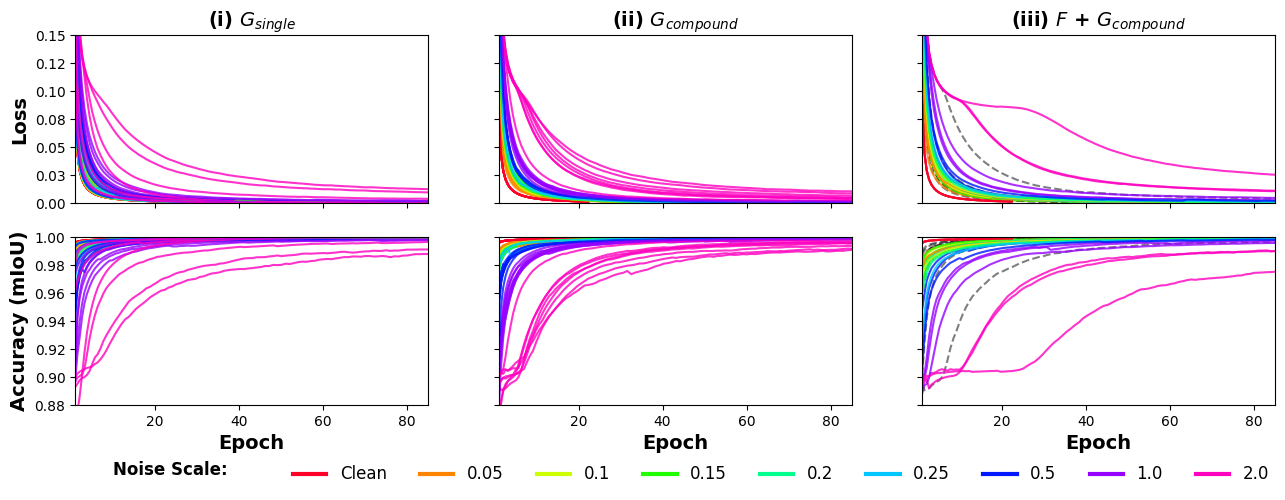

In [ ]:

savefigure=False #save image?
save_path= None # saved in '../L=logs/' otherwise specify the path you want to save images 

model_type = 'restormer'
problem='firstbreak'
attack='none'
pretrained=False
c='gist_rainbow'
f =[None] 

ts_factor=0.9

fig, axes= plt.subplots(nrows=2, ncols=3, sharex= True, sharey= False)
Al=0.8
ax=axes.flatten()
c2=['k','k','k','k']
cmap_c = LinearSegmentedColormap.from_list('single_type', c2, N=4)
a0=[ax[0],ax[3]]
for folder in f:
    for noise_type in [7,8,10,9,11,12]:
        Plot_logs_nscale(problem,model_type,noise_type,attack='none',ax=a0,c=c,ts_factor=ts_factor,
                           a=Al,pretrained=pretrained,folder=folder,L='-')
a0[0].legend().set_visible(False)
a1=[ax[1],ax[4]]
for folder in f:
    for noise_type in [0,1,2,3,15,16,18,19]:

        Plot_logs_nscale(problem,model_type,noise_type,attack='none',ax=a1,c=c,ts_factor=ts_factor, 
                            a=Al,pretrained=pretrained,folder=folder,L='-')
    
a1[0].legend().set_visible(False)

a2=[ax[2],ax[5]]

for folder in f:

    Plot_logs_nscale(problem,model_type,1,attack='none',ax=a2,c=cmap_c,ts_factor=ts_factor,
                           a=0.5,pretrained=pretrained,folder=folder,L='--')
    for noise_type in [4,6,5]:
        Plot_logs_nscale(problem,model_type,noise_type,attack='none',ax=a2,c=c,ts_factor=ts_factor,
                           a=Al,pretrained=pretrained,folder=folder,L='-')
Loss_ax=[ax[0],ax[1],ax[2]]
Acc_ax=[ax[3],ax[4],ax[5]]
for i in range (0,3,1):
    
    Loss_ax[i].set_ylabel('')
    Acc_ax[i].set_xlabel('Epoch',fontsize=14,fontweight='bold')
    
    if problem =='firstbreak':
        if model_type!='unet':
            Loss_ax[i].set_ylim([0,0.15])
            Acc_ax[i].set_ylim([0.88,1])
        else:
            Loss_ax[i].set_ylim([0.3,0.42])
            Acc_ax[i].set_ylim([0.88,1])
        Acc_ax[0].set_ylabel('Accuracy (mIoU)',fontsize=14,fontweight='bold')
        
    else:
        if model_type!='unet':
            Loss_ax[i].set_ylim([0,0.04])
            Acc_ax[i].set_ylim([0.18,0])
        else:
            Loss_ax[i].set_ylim([0,0.15])
            Acc_ax[i].set_ylim([0.1,0.3])
        
        Acc_ax[0].set_ylabel('Accuracy (RMSE)',fontsize=14,fontweight='bold')

        
    Loss_ax[i].set_xlim([1,85])
    Acc_ax[i].locator_params(axis ='x',nbins=6)
    Loss_ax[i].set_title('')
            
    Loss_ax[i].locator_params(axis ='y',nbins=7)
    Loss_ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    Acc_ax[i].locator_params(axis ='y',nbins=7)
    Acc_ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax[0].set_title('(i) $G_{single}$', fontsize=14, fontweight='bold')
ax[1].set_title('(ii) $G_{compound}$', fontsize=14, fontweight='bold')
ax[2].set_title('(iii) $F$ + $G_{compound}$', fontsize=14, fontweight='bold')
Loss_ax[0].set_ylabel('Loss',fontsize=14,fontweight='bold')

for i in [1,2,4,5]:
    ax[i].set_yticklabels([])

a2[0].legend().set_visible(False)

h,l = a1[1].get_legend_handles_labels()
L=a1[1].legend([h[0], h[1],h[2], h[3],h[4], h[5],h[6], h[7],h[8]],
                     ['Clean','0.05','0.1','0.15','0.2','0.25','0.5','1.0','2.0'],
                     loc='upper center', bbox_to_anchor=(0.8, -0.27),
                     fontsize=12,
                     labelcolor='k',facecolor='none',edgecolor='none',ncol=9)  

for b in range (0,9,1):
    L.get_lines()[b].set_linewidth(3)
    L.get_lines()[b].set_alpha(1)


if problem =='firstbreak':
    Acc_ax[0].text(10,0.83, 'Noise Scale:', fontsize=12, fontweight='bold') #transformers
    
else:
    if model_type != 'unet':
        
        Acc_ax[0].text(10,0.26, 'Noise Scale:', fontsize=12, fontweight='bold')
    else:
        Acc_ax[0].text(10,0.01, 'Noise Scale:', fontsize=12, fontweight='bold')

if savefigure==True:
    if save_path is None:
        save_path = Path(f"../images/Logs/")
        save_path.mkdir(parents=True, exist_ok=True)
            
    plt.savefig(f'{save_path}/Logs_S_C_G_{problem}_{model_type}_attack_{attack}_noisetype{noise_type}_noisscales_pt_{pretrained}.jpg',dpi=1000, bbox_inches='tight',transparent=True)
plt.show()


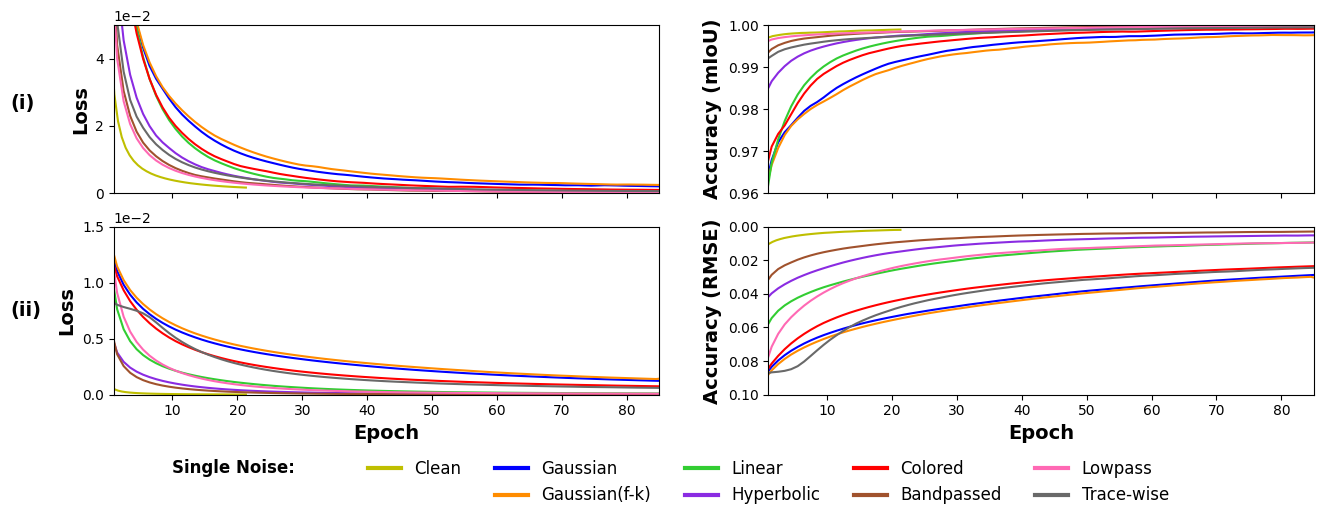

In [ ]:


savefigure=False #save image?
save_path= None # saved in '../L=logs/' otherwise specify the path you want to save images 

model_type = 'restormer'
problem='firstbreak'
attack='none'
pretrained=False
c='gist_rainbow'
N_type='single' #compound or single
folder=None
ts_factor=0.6

Plot_logs_Mean(model_type=model_type,attack=attack,pretrained=pretrained,c=c,N_type=N_type,folder=folder,ts_factor=ts_factor)

if savefigure==True:
    if save_path is None:
        save_path = Path(f"../images/Logs/")
        save_path.mkdir(parents=True, exist_ok=True)
            
    plt.savefig(f'{save_path}/Mean_logs_{model_type}_attack_{attack}_pt_{pretrained}_{N_type}_noises.jpg',dpi=1000, bbox_inches='tight',transparent=True)
plt.show()
